<a href="https://colab.research.google.com/github/daeyeong8855/Image-Manipulation-and-Dataset-Construction/blob/main/Python_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B3%BC_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC_%2C_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

numpy는 반복문 없이 배열을 처리 가능
* 대용량 데이터를 계산할 때 빠르고 효율적인 계산
* 파이썬 리스트에 비해 효율적

## 단일 객체 저장 및 불러오기

In [7]:
import numpy as np
import os

# 단일 객체 생성
array = np.arange(1,10)

# numpy 형태로 저장
os.makedirs('./data', exist_ok=True)
np.save('./data/save.npy', array)

result = np.load('./data/save.npy')
print(result)

[1 2 3 4 5 6 7 8 9]


## 복수 객체 저장 및 불러오기
복수 저장은 np.savez

In [14]:
# 객체 생성
array01 = np.arange(0,10)
array02 = np.arange(10,20)
array03 = np.arange(20,30)

# numpy 저장
np.savez('./data/multi_save.npz', array1=array01,array2=array02,array3=array03)

data = np.load('./data/multi_save.npz')
result01 = data['array1']
print(result01)

[0 1 2 3 4 5 6 7 8 9]


## 정렬

In [51]:
array = np.random.randint(0,10,10)
#array.sort() # array를 영구적으로 정렬
print(np.sort(array))
print(array[::-1])

# 여러 행
array1 = np.array(np.random.randint(0,10,(2,5)))
print("여러행")
print(array1)

# array1.sort(axis=0)
print('세로')
print(np.sort(array1,axis=0))
print('가로')
print(np.sort(array1,axis=1))

[0 0 1 2 2 4 7 8 8 8]
[8 0 2 0 2 8 4 8 1 7]
여러행
[[7 3 9 0 1]
 [8 2 1 7 3]]
세로
[[7 2 1 0 1]
 [8 3 9 7 3]]
가로
[[0 1 3 7 9]
 [1 2 3 7 8]]


## 균일한 간격의 데이터 생성

In [45]:
np.linspace(0,5,3)

array([0. , 2.5, 5. ])

## 난수 재현

In [49]:
np.random.seed(7777)
print(np.random.randint(0,10,(2,3)))

[[6 0 9]
 [8 3 8]]


## 배열 복사
array2 = array1 로 복사를 하면
array2를 바꿀 때 array1에도 영향이 감

* 이를 방지하기 위해 copy()를 사용

In [72]:
np.random.seed(0)
array1 = np.random.randint(0,10,5)
array2 = array1
array3 = array1.copy() # 복사의
array4 = np.copy(array1)  # 두가지 방법

array2[0] = 99
array3[1] = 99
array4[2] = 99
print(array1)
print(array2)
print(array3)
print(array4)

[99  0  3  3  7]
[99  0  3  3  7]
[ 5 99  3  3  7]
[ 5  0 99  3  7]


## Numpy 중복 원소 제거
np.unique

In [75]:
array5 = np.array([1,1,2,2,3,3,4])

temp = np.unique(array5)
print(f'중복 제거 >> {temp}')

중복 제거 >> [1 2 3 4]


## 브로드 캐스팅
서로 크기가 다른 행렬 연산을 도와줌

In [76]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([10,20,30])

C = A+B

print(C)

[[11 22 33]
 [14 25 36]]


## 이미지 저장
opencv 사용

* numpy.save는 데이터 자체를 저장하여 파일 용량이 큼

* PIL은 이미지 형태로 저장하여 용량이 상대적으로 작음

In [85]:
!pip install opencv-python==4.5.5.64
import cv2
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


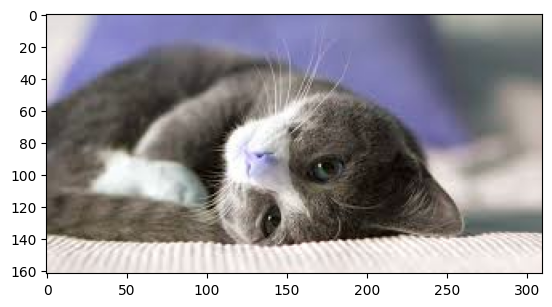

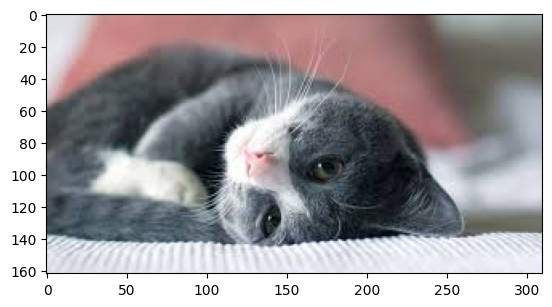

In [83]:
img = cv2.imread('./data/cat.png')
plt.imshow(img)
plt.show()
# 색상 문제 -> BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()


# 이미지 저장 불러오기
np.save('./data/image.npy', img)
img_data = np.load("./data/image.npy")
plt.imshow(img기
plt.show()

## 이미지 저장 효율 비교


<PIL.Image.Image image mode=L size=310x162 at 0x7F64260BDDB0>


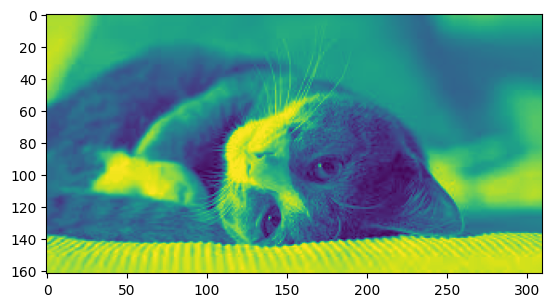

50348 26808


In [96]:
from PIL import Image

# 이미지 불러오기
img = Image.open('./data/cat.png').convert('L') # 그레이 스케일 변환
print(img)

img_array = np.array(img)

np.save('./data/pil_image.npy', img_array)
img_array1 = np.load('./data/pil_image.npy')

# PIL 이미지로 변환
img = Image.fromarray(np.uint8(img_array1))
plt.imshow(img)
plt.show()
img.save('./data/image_numpy.png')

np_save_size = os.path.getsize("./data/pil_image.npy")
pil_save_size = os.path.getsize('./data/image_numpy.png')
print(np_save_size, pil_save_size)